# Datasets

In [1]:
import pandas as pd
import os
def load_data(path):
    df = pd.read_excel(path, index_col='交易时间')
    df.dropna(inplace=True)
    return df

In [3]:
import numpy as np
path = 'datasets/'
list_df = pd.read_excel(os.path.join(path, '指数数据表.xlsx'), dtype={'指数编码':np.str_}, index_col='指数编码')
list_df.index = list_df.index.astype(np.str_)

In [4]:
list_dict = list_df['指数名称'].to_dict()
list_dict

{'SPX': '标普500',
 'MXX': '墨西哥BOLSA',
 'TSX': '加拿大多伦多S&P/TSX 综合指数',
 'BVSP': '巴西IBOVESPA',
 'MERV': 'S&P Merval',
 'FTWICOLL': 'FTSE Colombia',
 'IPSA': 'S&P CLX IPSA',
 'IACR': 'Costa Rica Indice Accionario',
 'DJIA': '道琼斯工业平均',
 'IXIC': '纳斯达克综合指数',
 'FTSE': '英国富时100',
 'FCHI': '法国CAC40',
 'GDAXI': '德国DAX',
 'IBEX': '西班牙IBEX35',
 'AEX': '荷兰AEX',
 'SSMI': '瑞士SMI',
 'BFX': '比利时BFX',
 'HSI': '恒生指数',
 'STI': '富时新加坡海峡时报',
 'N225': '日经225',
 'KS11': '韩国综合指数',
 'AS51': '澳大利亚标普200指数',
 'SENSEX': '孟买Sensex30',
 'HS300': '沪深300',
 'SZ': '上证指数'}

In [8]:
ret_origin_df=pd.DataFrame()
path = '/指数日线数据/'
for i in os.listdir(path):
    code = i.split('.xls')[0].split('K线导出_')[-1].split('_日线数据')[0]
    orig = load_data(os.path.join(path, i))
    break

In [9]:
orig

,证券代码,证券名称,开盘价,最高价,最低价,收盘价,涨跌,涨跌幅%,成交量,成交额
交易时间,,,,,,,,,,
2000-01-04,399001,深证成指,3374.110,3512.297,3360.207,3497.060,——,——,7344508.0,5.236590e+09
2000-01-05,399001,深证成指,3500.133,3589.177,3468.688,3486.285,-10.7752,-0.30812,9373897.0,7.411260e+09
2000-01-06,399001,深证成指,3475.460,3663.215,3454.348,3655.200,168.915,4.84513,11240481.0,9.095856e+09
2000-01-07,399001,深证成指,3701.477,3848.060,3701.477,3828.040,172.84,4.72861,29900112.0,1.904964e+10
2000-01-10,399001,深证成指,3881.746,3929.062,3832.195,3921.483,93.4429,2.44101,26987104.0,1.855548e+10
...,...,...,...,...,...,...,...,...,...,...
2022-04-26,399001,深证成指,10401.990,10548.960,10181.170,10206.640,-172.645,-1.66337,433566387.0,4.428209e+11
2022-04-27,399001,深证成指,10090.980,10652.920,10087.530,10652.900,446.267,4.37232,476823020.0,4.947829e+11
2022-04-28,399001,深证成指,10607.790,10743.170,10498.660,10628.920,-23.9844,-0.225144,410129137.0,4.518742e+11


In [11]:
ret_origin_df=pd.DataFrame()
path = '附录_数据/指数日线数据/'
for i in os.listdir(path):
    code = i.split('.xls')[0].split('K线导出_')[-1].split('_日线数据')[0]
    ret_origin_df[list_dict[code]] = load_data(os.path.join(path, i))['收盘价']

In [12]:
ret_origin_df.head()

,深证成指,德国DAX,孟买Sensex30,富时意大利MIB,西班牙IBEX35,澳大利亚标普200指数,比利时BFX,日经225,墨西哥MXX,英国富时100,...,荷兰AEX,奥地利ATX,道琼斯工业平均,俄罗斯RTS,上证指数,台湾加权,法国CAC40,标普500,富时新加坡海峡时报,纳斯达克
交易时间,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3497.060,6586.95,5491.01,NaN,11206.6,3093.7,3172.21,19002.86,6675.27,6665.9,...,642.25,1194.41,10997.93,NaN,1406.37,8756.55,5672.02,1399.42,2549.01,3901.69
2000-01-05,3486.285,6502.07,5357.00,NaN,10863.1,3018.7,3057.53,18542.55,6764.31,6535.9,...,632.31,1192.89,11122.65,173.00,1409.68,8849.87,5479.70,1402.11,2425.90,3877.54
2000-01-06,3655.200,6474.92,5421.53,NaN,NaN,2999.3,3061.09,18168.27,6751.65,6447.2,...,624.21,NaN,11253.26,186.26,1463.94,8922.03,5450.11,1403.45,2409.00,3727.13
2000-01-07,3828.040,6780.96,5414.48,NaN,11102.4,3023.4,3138.55,18193.41,7047.09,6504.8,...,644.86,1223.61,11522.56,NaN,1516.60,8849.87,5539.61,1441.47,2449.96,3882.62
2000-01-10,3921.483,6925.52,5518.39,NaN,11173.3,3084.0,3203.75,NaN,7333.70,6607.7,...,655.14,1236.09,11572.20,200.81,1545.11,9102.60,5646.12,1457.60,2457.59,4049.67


## 清洗数据

In [13]:
ret_cleaned_df = ret_origin_df.fillna(method="ffill").dropna()

In [14]:
ret_cleaned_df.head()

,深证成指,德国DAX,孟买Sensex30,富时意大利MIB,西班牙IBEX35,澳大利亚标普200指数,比利时BFX,日经225,墨西哥MXX,英国富时100,...,荷兰AEX,奥地利ATX,道琼斯工业平均,俄罗斯RTS,上证指数,台湾加权,法国CAC40,标普500,富时新加坡海峡时报,纳斯达克
交易时间,,,,,,,,,,,,,,,,,,,,,
2005-01-04,3025.416,4290.50,6651.01,31094.0,9120.0,4058.6,2987.09,11517.75,12777.13,4847.0,...,352.68,2469.88,10630.78,552.22,1242.77,6060.46,3863.30,1188.05,1997.37,2107.86
2005-01-05,3052.860,4258.24,6458.84,30976.0,9024.4,4039.4,2971.79,11437.52,12591.33,4806.0,...,350.16,2446.96,10597.83,552.22,1251.94,5988.37,3829.36,1183.74,1998.51,2091.24
2005-01-06,3028.727,4300.94,6367.39,31073.0,9024.4,4029.9,2992.43,11492.26,12703.47,4824.3,...,353.60,2446.96,10622.88,552.22,1239.43,5982.12,3856.48,1187.89,2011.78,2090.00
2005-01-07,3035.587,4316.40,6420.46,31128.0,9041.1,4063.2,3002.65,11433.24,12453.33,4854.1,...,354.46,2475.13,10603.96,552.22,1244.75,5935.99,3877.96,1186.19,2002.99,2088.61
2005-01-10,3062.730,4307.37,6308.54,31134.0,9028.5,4074.9,3001.24,11433.24,12446.10,4840.7,...,355.13,2455.04,10621.03,552.22,1252.40,5942.85,3877.82,1190.25,2005.31,2097.04


## 求对数收益率

In [18]:
ret_log_df = (ret_cleaned_df/ret_cleaned_df.shift(1)).apply(np.log)
ret_log_df = ret_log_df.dropna()
ret_log_df.index.name='Date'
ret_log_df.head()


,深证成指,德国DAX,孟买Sensex30,富时意大利MIB,西班牙IBEX35,澳大利亚标普200指数,比利时BFX,日经225,墨西哥MXX,英国富时100,...,荷兰AEX,奥地利ATX,道琼斯工业平均,俄罗斯RTS,上证指数,台湾加权,法国CAC40,标普500,富时新加坡海峡时报,纳斯达克
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-05,0.009030,-0.007547,-0.029319,-0.003802,-0.010538,-0.004742,-0.005135,-0.006990,-0.014648,-0.008495,...,-0.007171,-0.009323,-0.003104,0.000000,0.007352,-0.011966,-0.008824,-0.003634,0.000571,-0.007916
2005-01-06,-0.007936,0.009978,-0.014260,0.003127,0.000000,-0.002355,0.006921,0.004775,0.008867,0.003801,...,0.009776,0.000000,0.002361,0.000000,-0.010043,-0.001044,0.007057,0.003500,0.006618,-0.000593
2005-01-07,0.002262,0.003588,0.008300,0.001768,0.001849,0.008229,0.003409,-0.005149,-0.019887,0.006158,...,0.002429,0.011446,-0.001783,0.000000,0.004283,-0.007741,0.005554,-0.001432,-0.004379,-0.000665
2005-01-10,0.008902,-0.002094,-0.017585,0.000193,-0.001395,0.002875,-0.000470,0.000000,-0.000581,-0.002764,...,0.001888,-0.008150,0.001608,0.000000,0.006127,0.001155,-0.000036,0.003417,0.001158,0.004028
2005-01-11,0.002231,-0.011526,-0.013673,-0.012736,-0.006902,-0.000540,-0.007025,0.009293,-0.018595,-0.004555,...,-0.007774,-0.008057,-0.006121,-0.007945,0.004032,0.005506,-0.007462,-0.006118,0.001555,-0.008342


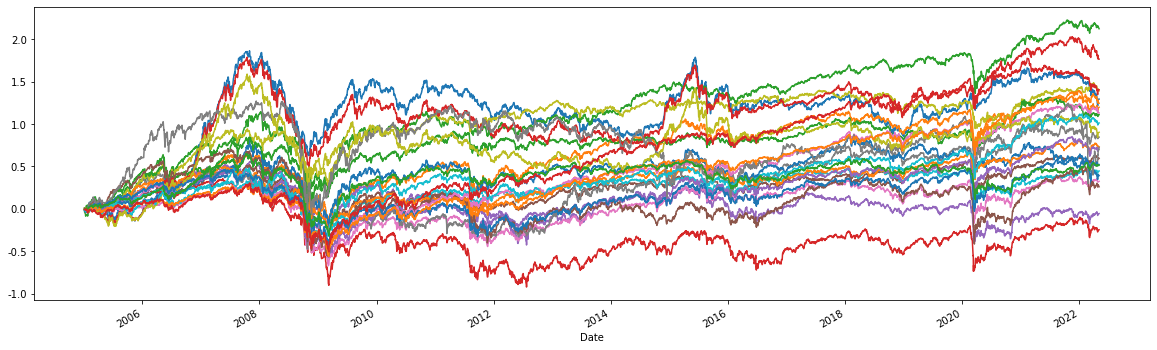

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
ret_log_df.cumsum().plot(figsize=(20, 6), legend=False)
plt.savefig('ret_log_plot.png', dpi=300)

## 相关系数矩阵

### 全局相关系数

/share/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/share/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35777 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/share/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/share/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/share/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/share/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22269 mi

<AxesSubplot:>

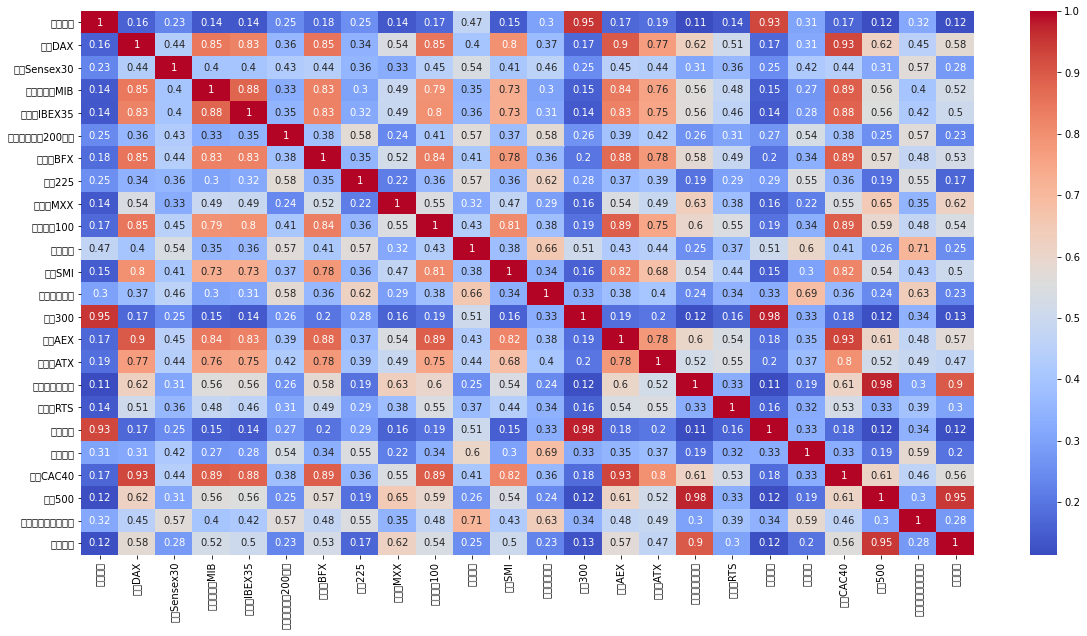

In [12]:
# correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(ret_log_df.corr(), annot = True, cmap='coolwarm')

<Figure size 432x288 with 0 Axes>

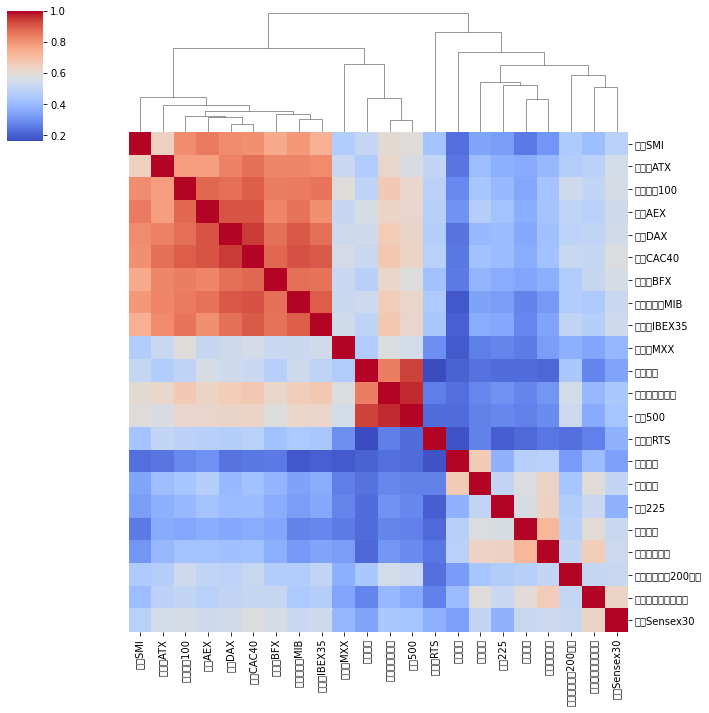

In [13]:
plt.figure()
g = sns.clustermap(ret_log_df[['俄罗斯RTS', '奥地利ATX', '道琼斯工业平均', '标普500', '台湾加权', '恒生指数',
       '富时新加坡海峡时报', '韩国综合指数', '荷兰AEX', '德国DAX', '富时意大利MIB', '法国CAC40',
       '西班牙IBEX35', '英国富时100', '比利时BFX', '上证指数', '澳大利亚标普200指数', '纳斯达克',
       '墨西哥MXX', '孟买Sensex30', '日经225', '瑞士SMI']].iloc[-600:].corr(), cmap='coolwarm')
g.ax_row_dendrogram.remove()
#g.savefig('heat_map.jpg')

### rolling相关系数

In [14]:
from tqdm import tqdm
def cal_rolling_corr(ret_df, min_periods):
    """
    df: pd.DataFrame, 行标题日期
    """
    _corr_ret_list = []
    _corr_ret_df = pd.DataFrame()
    for i in tqdm(range(ret_df.shape[0])):
        if i<min_periods: 
            _corr_ret_list.append(np.nan)
            _corr_ret_df[ret_df.index[i]] = np.nan * ret_df.iloc[i]
        else:
            _ret_rolling_df = ret_df.iloc[i-min_periods:i, :]
            _corr = (_ret_rolling_df.corr().sum()-1)/_ret_rolling_df.shape[1]
            _corr_ret_list.append(_corr.mean())
            _corr_ret_df[ret_df.index[i]]=_corr
    rolling_corr_ts = pd.Series(_corr_ret_list, index=ret_df.index)
    rolling_corr_df = _corr_ret_df.T
    return rolling_corr_ts, rolling_corr_df

In [15]:
rolling_corr_ts, rolling_corr_df= cal_rolling_corr(ret_log_df[['俄罗斯RTS', '奥地利ATX', '道琼斯工业平均', '标普500', '台湾加权', '恒生指数', 
       '富时新加坡海峡时报', '韩国综合指数', '荷兰AEX', '德国DAX', '富时意大利MIB', '法国CAC40',
       '西班牙IBEX35', '英国富时100', '比利时BFX',  '澳大利亚标普200指数', '纳斯达克',
       '墨西哥MXX', '孟买Sensex30', '日经225', '瑞士SMI']], min_periods=300)
# rolling_corr_ts, rolling_corr_df= cal_rolling_corr(ret_log_df, min_periods=60)

 71%|███████   | 2969/4209 [00:04<00:01, 730.14it/s]


KeyboardInterrupt: 

In [ ]:
rolling_corr_ts.plot(figsize=(20,6), legend=False)

### 生成邻接矩阵

In [ ]:
tmp = ret_log_df.corr().abs()
corr_threshold_val = 0.3
tmp[tmp<corr_threshold_val]=np.nan
D = (2*(1-tmp)).apply(np.sqrt)
#D = D.fillna(0)
adjacent_matrix_df = (-D).apply(np.exp)
adjacent_matrix_df = adjacent_matrix_df - np.identity(adjacent_matrix_df.shape[1])
adjacent_matrix_df = adjacent_matrix_df.fillna(0)
adjacent_matrix_df

## 求度的时间序列
这里需要注意，以下代码求的k是绝对度，并没有对度进行每个时刻求比例。

In [ ]:
from tqdm.notebook import tqdm
def cal_distance(ret, corr_threshold_val=0.):
    tmp = ret.corr().abs()
    #tmp[tmp<corr_threshold_val]=np.nan
    D = (2*(1-tmp)).apply(np.sqrt)
    return D

def cal_k(ret, min_periods=200):
    """
    df: pd.DataFrame, 行标题日期
    """
    k_df = pd.DataFrame()
    for i in tqdm(range(ret.shape[0])):
        if i<min_periods: 
            k_df[ret.index[i]]=ret.iloc[i]*np.nan
        else:
            rolling_ret = ret.iloc[i-min_periods:i, :]
            D = cal_distance(rolling_ret)
            adjacent_matrix_df=(-D).apply(np.exp)
            adjacent_matrix_df = adjacent_matrix_df - np.identity(adjacent_matrix_df.shape[1])
            adjacent_matrix_df = adjacent_matrix_df.fillna(0)
            k_df[ret.index[i]] = adjacent_matrix_df.sum()
    return k_df.T

In [ ]:
k_df = cal_k(ret_log_df, 200)

In [ ]:
k_df.plot(figsize=(20,10))

In [ ]:
delta_k_df = k_df - k_df.shift(1)
delta_k_df.plot(figsize=(10,6))

## rolling

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMA
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")


class TimeSeriesNetwork():
    """
    对金融复杂网络进行时序建模
    1. 构建金融时间序列的复杂网络
    2. 应用AR、ARMA进行时序的层间链路建模
    3. 
    """
    def __init__(self, log_ret_df):
        """
        ret_df: 对数收益率面板数据，行为日期，列为标的，每一列为一条时间序列。
        """
        self.log_ret_df = log_ret_df
        self.network_nodes = log_ret_df.columns
        self.network_timeseries = log_ret_df.index
        self.p_dict = {}
   
    # ------------------------------------------------------------
    def rolling(self, rolling_windows=200, AR_windows=10):
        """
        主函数，在负责滚动窗口时，完成各个计算
        df: pd.DataFrame, 行标题日期
        """
        for i in tqdm(range(self.log_ret_df.shape[0])):
            if i<rolling_windows: 
                continue
            else:
                self.sliding_log_ret_df = self.sliding(self.log_ret_df, i, rolling_windows)
                self.distance_matrix_df = self.cal_distance_matrix(self.sliding_log_ret_df)
                self.adjacent_matrix_df = self.cal_adjacent_matrix(self.distance_matrix_df)
                self.k_df = self.cal_k(self.adjacent_matrix_df)
                
                if i >= 2 * rolling_windows + AR_windows:
                    model = self.cal_p(self.k_df)
                    return model
                    #self.w_matrix_df = self.cal_w_matrix(self.k_df, p, q)
                    #break
                    #self.cal_tsn_matrix(self.adjacent_matrix_df, self.w_matrix_df)
                    #if i >= 6*rolling_windows: return

    # ------------------------------------------------------------
    def sliding(self, df, i, sliding_windows):
        """
        对面板数据df的第i-periods到i行进行切片
        periods: 切片窗口大小
        """
        return df.iloc[i-sliding_windows:i, :]
    
    # ------------------------------------------------------------
    def cal_distance_matrix(self, log_ret_df):
        """
        计算距离矩阵，根据收益率面板数据df，基于相关系数
        log_ret_df：对数收益率面板
        """
        corr = log_ret_df.corr()
        distance_matrix_df = (2*(1-corr)).apply(np.sqrt)
        distance_matrix_df.date = log_ret_df.index.values[-1]
        return distance_matrix_df
    
    # ------------------------------------------------------------
    def cal_adjacent_matrix(self, distance_df):
        """
        计算邻接矩阵
        distance_df: 距离矩阵
        """
        adjacent_matrix_df=(-distance_df).apply(np.exp)
        adjacent_matrix_df = adjacent_matrix_df - np.identity(adjacent_matrix_df.shape[1])
        adjacent_matrix_df = adjacent_matrix_df.fillna(0)
        adjacent_matrix_df.date = distance_df.date
        try:
            self.adjacent_matrix_dict[str(adjacent_matrix_df.date)[:10]] = adjacent_matrix_df
        except:
            self.adjacent_matrix_dict = {}
            self.adjacent_matrix_dict[str(adjacent_matrix_df.date)[:10]] = adjacent_matrix_df
        return adjacent_matrix_df
    
    # ------------------------------------------------------------
    def cal_k(self, adjacent_matrix_df):
        """
        计算各个节点的度，根据邻接矩阵
        adjacent_matrix_df：邻接矩阵
        """
        k = adjacent_matrix_df.sum()
        k.date = adjacent_matrix_df.date
        try:
            tmp = self.k_df.T
            tmp[k.date] = k
            self.k_df = tmp.T
        except:
            self.k_df = pd.DataFrame()
            self.k_df[k.date] = k
            self.k_df = self.k_df.T
        return self.k_df
    
    # ------------------------------------------------------------   
    # def get_centrality(self):
    #     """
    #     """
    #     self.centrality['degree'] = self.k_df
       
    # ------------------------------------------------------------  
    def cal_p(self, k_df):
        """
        利用AIC准则定阶p
        """
        k_df = k_df.iloc[-200:]
        print('-'*10, k_df.index.values[-1])
        self.p_dict[k_df.index.values[-1]] = {}
        for j in k_df.columns.values:
            ts = k_df[j].fillna(method='ffill').dropna()
            res = sm.tsa.arma_order_select_ic(ts, ic="aic", max_ar=4)
            p, q = res.aic_min_order
            print('cal_p:', j, p, 'q:', q)
            model = ARIMA(ts, order=(p, 1, q)).fit()
            print(model.params)
            if p>=3:
                return model
            self.p_dict[k_df.index.values[-1]][j] = p
            
        return p, q
        #pd.DataFrame(self.p_dict).to_csv('ARMA_p_timeseries.csv')
        
        
        
    # ------------------------------------------------------------   
    def cal_w_matrix(self, k_df, p, q):
        """
        计算关联矩阵，根据节点的度矩阵，基于ARMA或AR时序模型
        k_df：节点的度，面板数据
        w_matrix: 关联矩阵W
        """
        params = pd.DataFrame()
        #print(k_df.shape)
        k_df = k_df.iloc[-200:]
        for j in k_df.columns.values:
            ts = k_df[j].fillna(method='ffill').dropna()
            model = ARIMA(ts, order=(p, 1, q)).fit()
            return
            print(model.params)
            ar_label = [i for i in model.params.keys() if 'ar.' in i]
            print(model.params.keys())
            print(ar_label)
            print(model.params)
            params_df = model.params.loc[ar_label]
            print(params_df)
            params_df.index = ['L1']
            params[j]= params_df
            
        w_matrix_t_1_df = pd.DataFrame(np.diag((params.loc['L1']-1).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_1_df.date = k_df.index.values[-1]

        w_matrix_t_2_df = pd.DataFrame(np.diag((params.loc['L2']-params.loc['L1']).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_2_df.date = k_df.index.values[-1]

        w_matrix_t_3_df = pd.DataFrame(np.diag((params.loc['L3']-params.loc['L2']).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_3_df.date = k_df.index.values[-1]
        
        w_matrix_t_4_df = pd.DataFrame(np.diag((-1 * params.loc['L4']).values),
                                   index=k_df.columns.values,
                                   columns=k_df.columns.values)
        w_matrix_t_4_df.date = k_df.index.values[-1]
        try:
            self.w_matrix_t_1_dict[str(w_matrix_t_1_df.date)[:10]] = w_matrix_t_1_df
            self.w_matrix_t_2_dict[str(w_matrix_t_2_df.date)[:10]] = w_matrix_t_2_df
            self.w_matrix_t_3_dict[str(w_matrix_t_3_df.date)[:10]] = w_matrix_t_3_df
            self.w_matrix_t_4_dict[str(w_matrix_t_4_df.date)[:10]] = w_matrix_t_4_df
        except:
            self.w_matrix_t_1_dict = {}
            self.w_matrix_t_1_dict[str(w_matrix_t_1_df.date)[:10]] = w_matrix_t_1_df
            self.w_matrix_t_2_dict = {}
            self.w_matrix_t_2_dict[str(w_matrix_t_2_df.date)[:10]] = w_matrix_t_2_df
            self.w_matrix_t_3_dict = {}
            self.w_matrix_t_3_dict[str(w_matrix_t_3_df.date)[:10]] = w_matrix_t_3_df
            self.w_matrix_t_4_dict = {}
            self.w_matrix_t_4_dict[str(w_matrix_t_4_df.date)[:10]] = w_matrix_t_4_df
        return w_matrix_t_1_df,w_matrix_t_2_df,w_matrix_t_3_df,w_matrix_t_4_df
    
    
    # ------------------------------------------------------------   
    def cal_tsn_matrix(self, adjacent_matrix_df, w_matrix_df):
        """
        计算超演化矩阵(tsn matrix)
        adjacent_matrix_df: 邻接矩阵
        w_matrix_df: 关联矩阵
        """
        try:
            tsn_matrix = self.tsn_matrix
            z = pd.DataFrame(np.zeros((tsn_matrix.shape[0],adjacent_matrix_df.shape[0])),
                                    index=tsn_matrix.index,
                                    columns=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns])
            tmp01 = pd.concat([tsn_matrix, z], axis=1)
            a = pd.DataFrame(adjacent_matrix_df.values,
                           index=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.index],
                           columns=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns])
            w = pd.DataFrame(w_matrix_df.values,
                           index=a.index,
                           columns=tsn_matrix.columns[tsn_matrix.shape[1]-adjacent_matrix_df.shape[0]:tsn_matrix.shape[1]])
            if tsn_matrix.shape[1]<2*adjacent_matrix_df.shape[0]:
                tmp02 = pd.concat([w, a], axis=1)
            else:
                z = pd.DataFrame(np.zeros((adjacent_matrix_df.shape[0],tsn_matrix.shape[1]-adjacent_matrix_df.shape[0])),
                                        index=a.index,
                                        columns=tsn_matrix.index[:tsn_matrix.shape[1]-adjacent_matrix_df.shape[0]])
                tmp02 = pd.concat([z, w, a], axis=1)
            self.tsn_matrix = pd.concat([tmp01, tmp02], axis=0)
            
        except:
            self.tsn_matrix = pd.DataFrame(adjacent_matrix_df.values,
                                           index=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns],
                                           columns=[str(adjacent_matrix_df.date)[:10]+'_'+i for i in adjacent_matrix_df.columns])

        return self.tsn_matrix
    
    

In [17]:
tsn = TimeSeriesNetwork(ret_log_df)
model = tsn.rolling()

---------- 2006-09-13T00:00:00.000000000
cal_p: 深证成指 1 q: 0
const           0.000633
ar.L1.D.深证成指    0.016791
dtype: float64
cal_p: 德国DAX 1 q: 0
const            0.005481
ar.L1.D.德国DAX    0.035787
dtype: float64
cal_p: 孟买Sensex30 3 q: 2
const                 0.003036
ar.L1.D.孟买Sensex30    0.080063
ar.L2.D.孟买Sensex30   -0.767132
ar.L3.D.孟买Sensex30   -0.123365
ma.L1.D.孟买Sensex30   -0.108218
ma.L2.D.孟买Sensex30    0.887561
dtype: float64



In [18]:
model.

SyntaxError: invalid syntax (<ipython-input-18-e5c9403477cf>, line 1)

In [68]:
def principle_eigen(matrix):
    eigenvalue, eigenmatrix = np.linalg.eig(matrix)
    principle_eigenvalue = eigenvalue[0]
    principle_eigenvector = eigenmatrix[:,0]
    return principle_eigenvalue, principle_eigenvector

## 只用邻接矩阵求特征向量

In [69]:
p_eigenval_ts, p_eigenvector_ts={}, {}
for i in tqdm(tsn.adjacent_matrix_dict):
    p_eigenvalue, p_eigenvector = principle_eigen(tsn.adjacent_matrix_dict[i].values)
    p_eigenvector_ts[i] = p_eigenvector
    p_eigenval_ts[i] = p_eigenvalue
    print(i, p_eigenvalue, p_eigenvector)
p_eigenvector_df = pd.DataFrame(p_eigenvector_ts, index=tsn.network_nodes).T
p_eigenval_df = pd.Series(p_eigenval_ts)


  0%|          | 0/1001 [00:00<?, ?it/s]

2005-10-21 1.1621948970489786 [-0.48075444 -0.44522584 -0.47309467 -0.43165091 -0.40063456]
2005-10-24 1.1608165470963407 [-0.48131926 -0.44661472 -0.46894321 -0.43356954 -0.40121911]
2005-10-25 1.1598344040953203 [-0.4816551  -0.44657007 -0.46802535 -0.4334628  -0.402052  ]
2005-10-26 1.159932964133696 [-0.48167381 -0.44633209 -0.46774439 -0.43482991 -0.40114354]
2005-10-27 1.1679113744628227 [-0.48252733 -0.44663926 -0.46787035 -0.43586801 -0.39849363]
2005-10-28 1.16274655288322 [-0.48284911 -0.44674648 -0.46643451 -0.43551753 -0.40004705]
2005-10-31 1.177676754238458 [-0.4839207  -0.44659803 -0.46824045 -0.43373761 -0.39873991]
2005-11-01 1.1781314236679221 [-0.48373491 -0.4467885  -0.46747804 -0.43469528 -0.39860365]
2005-11-02 1.18236393206411 [-0.48273228 -0.44785351 -0.46753207 -0.4347725  -0.39847637]
2005-11-03 1.1776146734090862 [-0.48294169 -0.44792075 -0.467693   -0.43440821 -0.39835548]
2005-11-07 1.1788576156500534 [-0.4827686  -0.44745623 -0.46754982 -0.43489278 -0.3987

<AxesSubplot:>

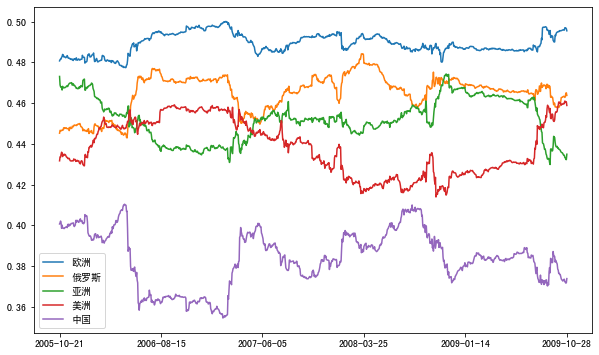

In [70]:
p_eigenvector_df.abs().plot(figsize=(10,6))

In [73]:
df = pd.DataFrame()
for i in tqdm(range(410, len(p_eigenval_df))):
    # 截取片段___________________________________
    val_df = p_eigenval_df.iloc[i-200:i]
    date_arr = val_df.index.values
    # 定位最大特征值___________________________________
    max_date = val_df.index[val_df.argmax()]
    max_val = val_df.loc[max_date]
    # 第一个特征向量___________________________________
    v_df = p_eigenvector_df.iloc[i-200:i] * np.nan
    a_matrix = np.matrix(tsn.adjacent_matrix_dict[date_arr[0]].values)
    lambda_matrix = np.matrix(np.eye(24) * max_val)
    v = np.matrix(res.loc[date]).T
    v_df.loc[date_arr[0]]  = np.array((l-a).I * v).flatten()
    print(v_df)
    break
    #res.loc[next_date]  = np.array((l-a).I * w * v).flatten()

    #df[next_date] = res.sum(axis=0)

  0%|          | 0/591 [00:00<?, ?it/s]

<AxesSubplot:>

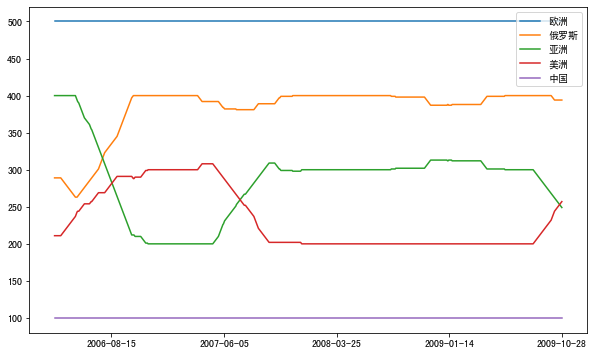

In [74]:
p_eigenvector_df.abs().rank(axis=1).rolling(window=100).sum().plot(figsize=(10,6))

In [2]:
df.T.abs().rank(axis=1).rolling(window=2).sum().plot(figsize=(10,6))

NameError: name 'df' is not defined

In [31]:
df = pd.read_csv('ARMA_p_timeseries.csv')

In [32]:
df.to_csv('gbk.csv', encoding='gbk')